In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
virus = pd.read_csv('enteric_virus.csv')

In [3]:
virus.columns

Index(['Sample ID', 'PatientNo', 'Age', 'DOB_Year', 'Year of enrollment',
       'Date of hospital entry', 'AdminDate', 'SiteRecruitment', 'Gender',
       'DateOnset', 'DateDischOrDeath', 'Length of stay', 'CentrallyCity',
       'ProvincialCity', 'LONGITUDE', 'LATITUDE', 'ContactDiar', 'BloodStool',
       'MucoidStool', 'NumberDiarEpi', 'AbdominalPain', 'ThreeDaysFever',
       'HaemoglobinResult', 'WhiteCellsResult', 'NeutrophilsResult',
       'LymphocytesResult', 'EosinophilsResult', 'PlateletsResult',
       'KnownTemp', 'Temp', 'Tap', 'Well', 'Rain', 'River', 'Pond', 'Bottled',
       'OtherWS', 'KeepAnimal', 'KillingAnimal', 'EatCookRawMeat',
       'IF_Bacterial', 'Rotavirus.PCR.', 'Ct.value', 'Norovirus2.PCR.',
       'Ct.value.1', 'Norovirus1.PCR.', 'Ct.value.2', 'Aichivirus.PCR.',
       'Ct.value.3', 'Adenovirus.PCR.', 'Ct.value.4', 'Sapovirus.PCR.',
       'Ct.value.5', 'Astrovirus.PCR.', 'Ct.value.6', 'Alphapapillomavirus',
       'Alphapolyomavirus', 'Alphatorquevirus'

In [4]:
virus["is_coinf"] = virus["is_coinf"].fillna(0)

usful = ['Age','Year of enrollment','Gender','DOB_Year',
        'ContactDiar','Tap',"Well","Rain","River","Pond","Bottled","KeepAnimal","KillingAnimal","EatCookRawMeat",'is_coinf']

usful2 = ['Year of enrollment','Gender',
        'ContactDiar','Tap',"Well","Rain","River","Pond","Bottled","KeepAnimal","KillingAnimal","EatCookRawMeat",'is_coinf']

df = [virus[i] for i in virus if i in usful]
df = pd.DataFrame(df)
X= df.T 


for i in usful2:
    X[i] = X[i].astype("object")
X["Age"] = X["Age"].astype("int16")
X["DOB_Year"] =X["DOB_Year"].astype("int16")
X["is_coinf"] =X["is_coinf"].astype("int16")


y =  virus['is_coinf']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 707 non-null    int16 
 1   DOB_Year            707 non-null    int16 
 2   Year of enrollment  707 non-null    object
 3   Gender              707 non-null    object
 4   ContactDiar         707 non-null    object
 5   Tap                 707 non-null    object
 6   Well                707 non-null    object
 7   Rain                707 non-null    object
 8   River               707 non-null    object
 9   Pond                707 non-null    object
 10  Bottled             707 non-null    object
 11  KeepAnimal          707 non-null    object
 12  KillingAnimal       707 non-null    object
 13  EatCookRawMeat      707 non-null    object
 14  is_coinf            707 non-null    int16 
dtypes: int16(3), object(12)
memory usage: 70.5+ KB


In [5]:

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X:
    if X[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X[col].unique())) <= 2:
            # Train on the training data
            le.fit(X[col])
            # Transform both training and testing data
            X[col] = le.transform(X[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

10 columns were label encoded.


In [6]:
X = pd.get_dummies(X)
print('Training Features shape: ', X.shape)

Training Features shape:  (707, 21)


In [7]:
X.corr(method='spearman')

,Age,DOB_Year,Gender,Tap,Well,Rain,River,Pond,Bottled,KeepAnimal,...,EatCookRawMeat,is_coinf,Year of enrollment_2012.0,Year of enrollment_2013.0,Year of enrollment_2014.0,Year of enrollment_2015.0,Year of enrollment_2016.0,ContactDiar_1.0,ContactDiar_2.0,ContactDiar_9.0
Age,1.000000,-0.906541,0.205285,0.078711,-0.036212,-0.036562,-0.069886,0.014155,0.012397,-0.013630,...,-0.347928,-0.297535,-0.152185,0.049346,-0.025488,0.058568,-0.043815,-0.036082,-0.008512,0.053496
DOB_Year,-0.906541,1.000000,-0.212533,-0.083802,0.004527,0.032389,0.091431,-0.012397,-0.003225,-0.000666,...,0.175322,0.305060,-0.046252,-0.248904,0.070295,0.170728,0.156657,0.005138,0.052147,-0.083617
Gender,0.205285,-0.212533,1.000000,-0.037242,-0.049786,-0.075835,0.063710,0.020747,0.023378,0.023685,...,-0.051102,-0.127668,0.037015,0.002896,-0.012361,0.003502,-0.025823,0.015446,-0.010222,-0.002212
Tap,0.078711,-0.083802,-0.037242,1.000000,-0.144069,-0.106947,-0.517270,-0.061075,-0.507738,0.020461,...,0.010638,0.015694,-0.027735,0.041554,-0.028544,-0.008360,0.031989,-0.043228,0.040047,-0.010880
Well,-0.036212,0.004527,-0.049786,-0.144069,1.000000,0.032481,-0.106288,0.107922,-0.091624,-0.004509,...,0.119412,0.080063,0.009652,0.126608,-0.042368,-0.089396,-0.022453,0.019287,-0.147050,0.197607
Rain,-0.036562,0.032389,-0.075835,-0.106947,0.032481,1.000000,-0.077603,-0.008934,-0.079988,-0.012157,...,0.014331,-0.025829,-0.025097,0.008423,0.013823,-0.011076,-0.016394,-0.022122,0.029800,-0.019453
River,-0.069886,0.091431,0.063710,-0.517270,-0.106288,-0.077603,1.000000,-0.037014,-0.308672,-0.177955,...,-0.052553,-0.013974,-0.066810,-0.052637,0.040018,0.035042,0.015834,0.012995,-0.003409,-0.009605
Pond,0.014155,-0.012397,0.020747,-0.061075,0.107922,-0.008934,-0.037014,1.000000,-0.038151,-0.012563,...,-0.038862,0.004955,-0.011970,0.056205,-0.020196,-0.031131,-0.007819,-0.010551,-0.090462,0.146908
Bottled,0.012397,-0.003225,0.023378,-0.507738,-0.091624,-0.079988,-0.308672,-0.038151,1.000000,0.176208,...,-0.015515,-0.026526,0.112449,-0.053582,-0.031412,0.038840,0.039979,0.029213,0.002298,-0.036457
KeepAnimal,-0.013630,-0.000666,0.023685,0.020461,-0.004509,-0.012157,-0.177955,-0.012563,0.176208,1.000000,...,0.115189,-0.000806,-0.013809,0.020005,-0.022055,0.006305,0.017289,-0.012961,0.037320,-0.041030


In [8]:
# Find correlations with the target and sort
correlations = X.corr(method='spearman')['is_coinf'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 ContactDiar_2.0             -0.021359
River                       -0.013974
KeepAnimal                  -0.000806
Pond                         0.004955
ContactDiar_9.0              0.013426
Tap                          0.015694
ContactDiar_1.0              0.016313
Year of enrollment_2014.0    0.030478
KillingAnimal                0.032710
Year of enrollment_2016.0    0.036422
Year of enrollment_2012.0    0.039223
EatCookRawMeat               0.079255
Well                         0.080063
DOB_Year                     0.305060
is_coinf                     1.000000
Name: is_coinf, dtype: float64

Most Negative Correlations:
 Age                         -0.297535
Gender                      -0.127668
Year of enrollment_2013.0   -0.031686
Year of enrollment_2015.0   -0.031570
Bottled                     -0.026526
Rain                        -0.025829
ContactDiar_2.0             -0.021359
River                       -0.013974
KeepAnimal                  -0.00080

In [9]:
correlations = X.corr(method='spearman')
correlations

,Age,DOB_Year,Gender,Tap,Well,Rain,River,Pond,Bottled,KeepAnimal,...,EatCookRawMeat,is_coinf,Year of enrollment_2012.0,Year of enrollment_2013.0,Year of enrollment_2014.0,Year of enrollment_2015.0,Year of enrollment_2016.0,ContactDiar_1.0,ContactDiar_2.0,ContactDiar_9.0
Age,1.000000,-0.906541,0.205285,0.078711,-0.036212,-0.036562,-0.069886,0.014155,0.012397,-0.013630,...,-0.347928,-0.297535,-0.152185,0.049346,-0.025488,0.058568,-0.043815,-0.036082,-0.008512,0.053496
DOB_Year,-0.906541,1.000000,-0.212533,-0.083802,0.004527,0.032389,0.091431,-0.012397,-0.003225,-0.000666,...,0.175322,0.305060,-0.046252,-0.248904,0.070295,0.170728,0.156657,0.005138,0.052147,-0.083617
Gender,0.205285,-0.212533,1.000000,-0.037242,-0.049786,-0.075835,0.063710,0.020747,0.023378,0.023685,...,-0.051102,-0.127668,0.037015,0.002896,-0.012361,0.003502,-0.025823,0.015446,-0.010222,-0.002212
Tap,0.078711,-0.083802,-0.037242,1.000000,-0.144069,-0.106947,-0.517270,-0.061075,-0.507738,0.020461,...,0.010638,0.015694,-0.027735,0.041554,-0.028544,-0.008360,0.031989,-0.043228,0.040047,-0.010880
Well,-0.036212,0.004527,-0.049786,-0.144069,1.000000,0.032481,-0.106288,0.107922,-0.091624,-0.004509,...,0.119412,0.080063,0.009652,0.126608,-0.042368,-0.089396,-0.022453,0.019287,-0.147050,0.197607
Rain,-0.036562,0.032389,-0.075835,-0.106947,0.032481,1.000000,-0.077603,-0.008934,-0.079988,-0.012157,...,0.014331,-0.025829,-0.025097,0.008423,0.013823,-0.011076,-0.016394,-0.022122,0.029800,-0.019453
River,-0.069886,0.091431,0.063710,-0.517270,-0.106288,-0.077603,1.000000,-0.037014,-0.308672,-0.177955,...,-0.052553,-0.013974,-0.066810,-0.052637,0.040018,0.035042,0.015834,0.012995,-0.003409,-0.009605
Pond,0.014155,-0.012397,0.020747,-0.061075,0.107922,-0.008934,-0.037014,1.000000,-0.038151,-0.012563,...,-0.038862,0.004955,-0.011970,0.056205,-0.020196,-0.031131,-0.007819,-0.010551,-0.090462,0.146908
Bottled,0.012397,-0.003225,0.023378,-0.507738,-0.091624,-0.079988,-0.308672,-0.038151,1.000000,0.176208,...,-0.015515,-0.026526,0.112449,-0.053582,-0.031412,0.038840,0.039979,0.029213,0.002298,-0.036457
KeepAnimal,-0.013630,-0.000666,0.023685,0.020461,-0.004509,-0.012157,-0.177955,-0.012563,0.176208,1.000000,...,0.115189,-0.000806,-0.013809,0.020005,-0.022055,0.006305,0.017289,-0.012961,0.037320,-0.041030


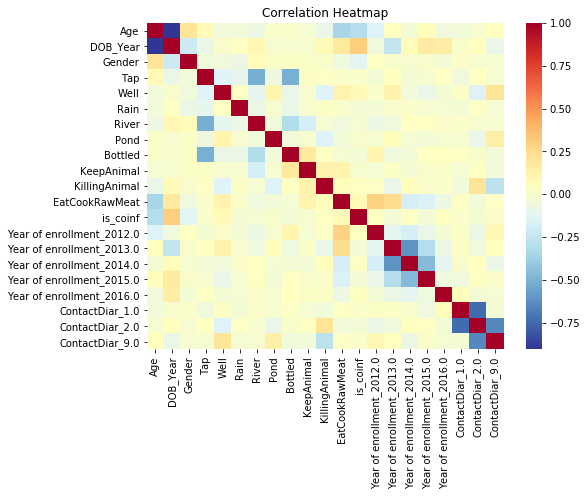

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap');

In [11]:
X["is_coinf"] = X["is_coinf"].mask(X["is_coinf"] >2, 3) 

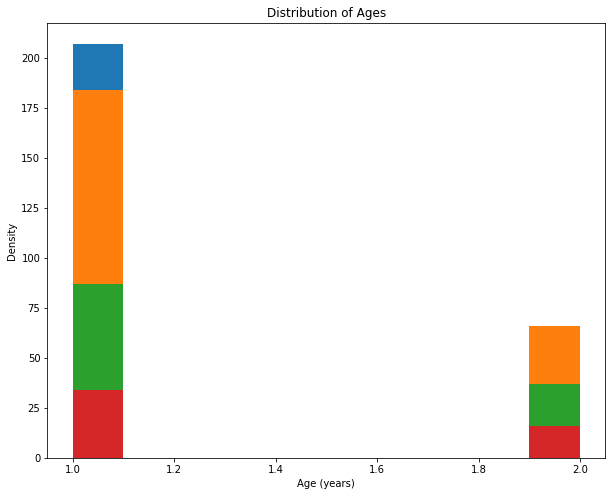

In [12]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
plt.hist(virus.loc[virus['is_coinf'] == 0, 'EatCookRawMeat'] , label = 'is_coinf == 0')

# KDE plot of loans which were not repaid on time
plt.hist(virus.loc[virus['is_coinf'] == 1, 'EatCookRawMeat'], label = 'is_coinf == 1')

# KDE plot of loans which were not repaid on time
plt.hist(virus.loc[virus['is_coinf'] == 2, 'EatCookRawMeat'], label = 'is_coinf == 2')

# KDE plot of loans which were not repaid on time
plt.hist(virus.loc[virus['is_coinf'] == 3, 'EatCookRawMeat'], label = 'is_coinf == 3')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');